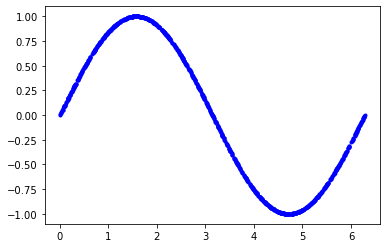

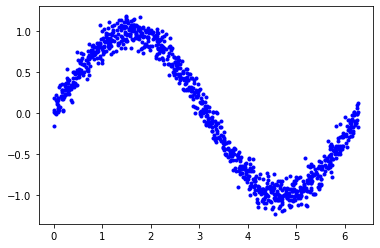

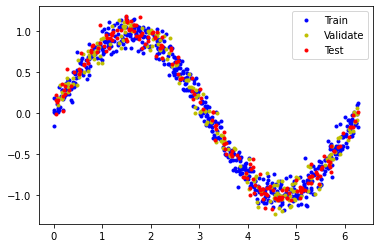

c:\Users\ssrut\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6660 - mae: 0.6763 - val_loss: 0.4691 - val_mae: 0.5724
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4216 - mae: 0.5416 - val_loss: 0.4066 - val_mae: 0.5468
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3733 - mae: 0.5276 - val_loss: 0.3893 - val_mae: 0.5396
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3570 - mae: 0.5184 - val_loss: 0.3716 - val_mae: 0.5265
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3405 - mae: 0.5065 - val_loss: 0.3534 - val_mae: 0.5121
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3240 - mae: 0.4942 - val_loss: 0.3357 - val_mae: 0.4981
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3079 - mae: 0.4819 - val_loss: 0.3187 - val_mae: 0.4847
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2925 - mae: 0.4702 - val_loss: 0.3023 - val_mae: 0.4716
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.277

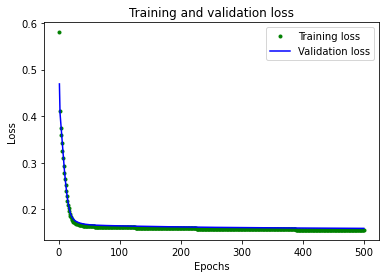

In [6]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

# We'll use Keras to create a simple model architecture
# Note: Changed tf.keras below to tensorflow.keras (code from the book)
from tensorflow.keras import layers

# From the file sineGen_Ch4
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here. This is useful to debug the code if the
# Seequence of random numbers generated is the same every run. The seed can be any number.
SEED = 1337
# Set the Global random seed which picks the same global seed across different versions
# of tools/libraries when this code is run on different versions of libraries.
tf.random.set_seed(SEED)
# Set the operation level seed on every run of the program
np.random.seed(SEED)
# Note: If global seed is set and operation level seed is not, then across 
# Different versions of the library the sequence might change.

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

# Add a small random number to each y value
# Old value was 0.1 to 0.001 and epochs also reduced to 500 from 1000 because loss
# Does not reduce with the given design of network
y_values += 0.1 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# Activation function used here is relu (Rectified Linear Unit)
def relu(input):
    return max(0.0, input)

model_1 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
# Later change the no. of nodes from 16 to 32 and observe the output predicted values
# Change the nodes 16 --> 32 --> 36 --> 38 --> 48 and observe the behaviour and 
# Summary of 
model_1.add(layers.Dense(32, activation='relu', input_shape=(1,)))

# The below operations are done by the keras internally on inputs and bias
# activation = activation_function((input * weight) + bias)

# Here, `inputs` and `weights` are both NumPy arrays with 16 
# elements each. The following operations are done by keras internally.
# output = sum((inputs * weights)) + bias

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print a summary of the model's architecture
model_1.summary()
# old value of epochs 1000 to 2000
# 500 with noise from 0.1 to 0.001
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=32,
                        validation_data=(x_validate, y_validate))

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


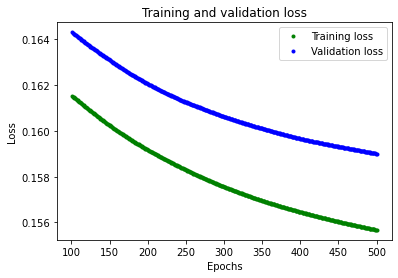

In [7]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

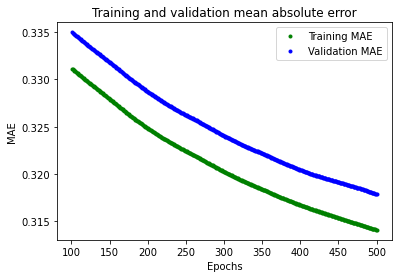

In [8]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


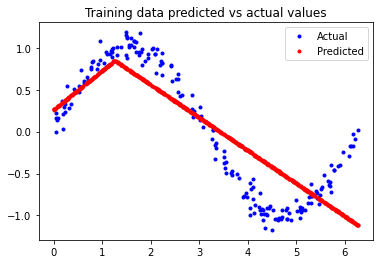

In [9]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()